In [1]:
pip install -q lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2

In [2]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

Looking in a start that we know that has a planet

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11958'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

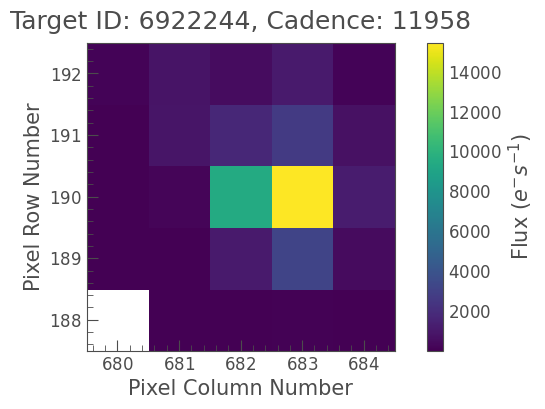

In [3]:
#kepler-8 that the moment 42 so frames=42
#search_target_pixelfile contains a lot of snapshots of the pixel grid of the luminosity of the stars
pixelfile = search_targetpixelfile('KIC 6922244',author="Kepler",cadence="long",quarter=4).download ()
pixelfile.plot(frame=42)

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

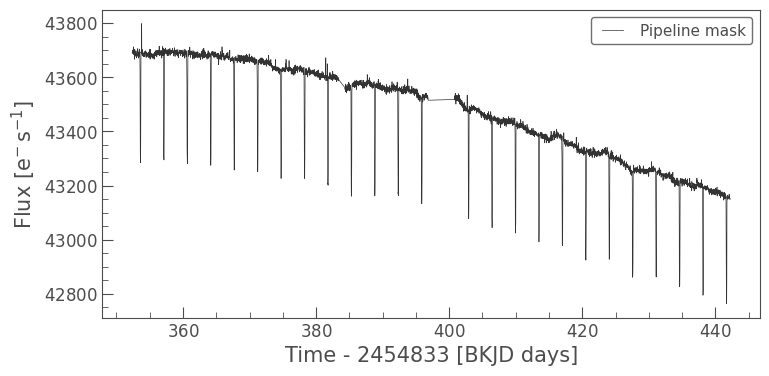

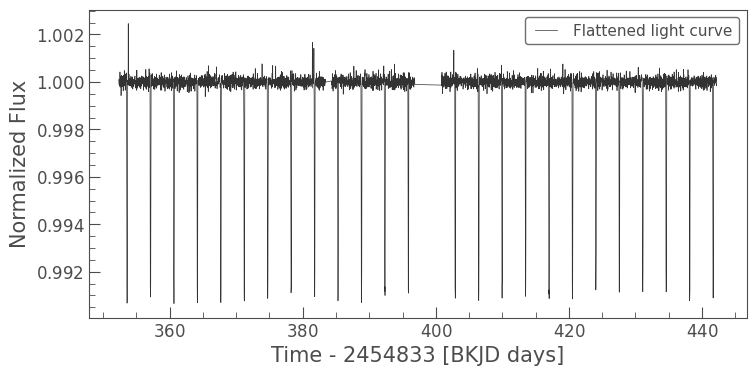

In [4]:
# Creating a light curve which combines the luminosity all over time
lc = pixelfile.to_lightcurve(aperture_mask=pixelfile.pipeline_mask)
lc.plot(label="Pipeline mask")
#Flatten to be eiaser to visualize the light curve
flatten = lc.flatten(window_length=31)
flatten.plot(label="Flattened light curve")

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

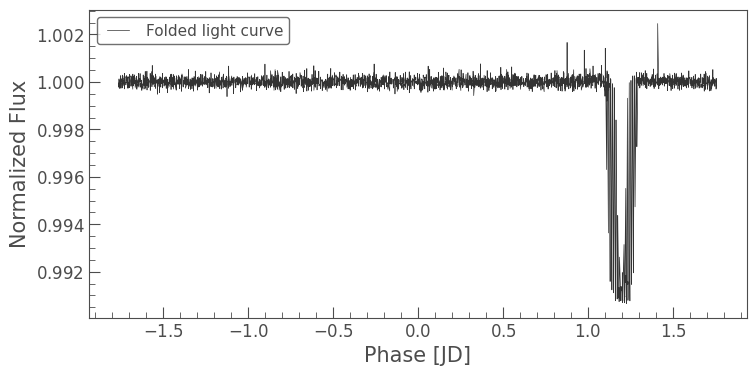

In [5]:
#Phase-fold the light curve to verify the period and transmit time
folded = flatten.fold(period=3.525)
folded.plot(label="Folded light curve")
#If the period is correct the spikes go and like form a depth and the features of that depth we can visualize some features about the planet
#To get the period we must use the periodgram

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

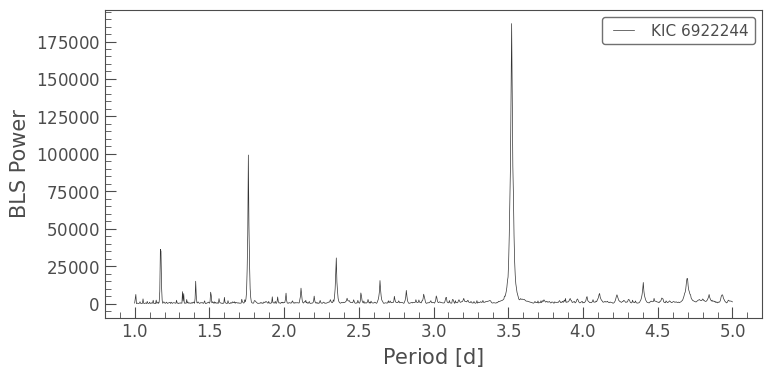

In [9]:
period = np.linspace(1,5,1000)
# Box Least Squares
bls = lc.to_periodogram(method="bls",period=period,frequency_factor=5000)
bls.plot()

In [14]:
#Period's value to the high to the highest peak in periodgram / transmit time and duration
exoplanet_period = bls.period_at_max_power
exo_transmit_time = bls.transit_time_at_max_power
exo_duration = bls.duration_at_max_power
print(exoplanet_period,exo_transmit_time,exo_duration)


3.5225225225225225 d 353.60632485035285 0.1 d


(-2.0, 2.0)

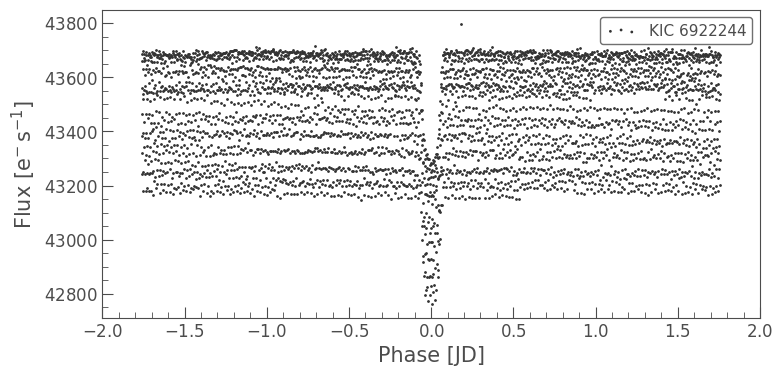

In [16]:
# Fold with a lot of information about the planet like size

ax = lc.fold(period=exoplanet_period,epoch_time=exo_transmit_time).scatter()
ax.set_xlim(-2, 2)